# Data Wrangling with Baltimore City 911 Report Data
## Homework 1 
### Suyash Kalwani

In [55]:
import pandas as pd

# Load and display the initial data structure
dataset_path = 'C:/Users/Suyash Kalwani/Downloads/Baltimore911.csv'
crime_data = pd.read_csv(dataset_path)

# Determine the dataset's dimensions
rows_count = crime_data.shape[0]
columns_count = crime_data.shape[1]

# Print the total number of rows and columns
print("Total Rows:", rows_count)
print("Total Columns:", columns_count)

Total Rows: 292761
Total Columns: 16


C:\Users\Suyash Kalwani\AppData\Local\Temp\ipykernel_9964\2128657388.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv(dataset_path)


In [56]:
import pandas as pd

# First, define column categories based on data types
total_rows = crime_data.shape[0]
column_details = []

# Analyze each column in the dataset
for column in crime_data.columns:
    data = crime_data[column]
    data_type = data.dtype
    percent_missing = data.isnull().sum() / total_rows * 100

    if pd.api.types.is_numeric_dtype(data):
        # For numeric columns, calculate summary statistics
        column_category = 'Numeric'
        summary_stats = f"Min: {data.min()}, Max: {data.max()}, Mean: {data.mean()}, " \
                        f"Median: {data.median()}, Std Dev: {data.std()}"
        distinct_values = 'N/A'
        most_common = 'N/A'
    elif pd.api.types.is_datetime64_any_dtype(data):
        # For datetime columns, no summary statistics needed
        column_category = 'Temporal'
        summary_stats = 'N/A'
        distinct_values = 'N/A'
        most_common = 'N/A'
    else:
        # For categorical or textual columns
        column_category = 'Symbolic/Discrete'
        distinct_values = data.nunique()
        most_common = data.value_counts().nlargest(3).to_dict()
        summary_stats = 'N/A'

    # Collecting details into a list
    column_details.append({
        'Column Name': column,
        'Category': column_category,
        'Statistics': summary_stats,
        'Distinct Values': distinct_values,
        'Top 3 Frequencies': most_common,
        'Missingness (%)': round(percent_missing, 2)
    })

# Displaying the collected information in a DataFrame
column_summary_df = pd.DataFrame(column_details)
print(column_summary_df)


C:\Users\Suyash Kalwani\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


        Column Name           Category  \
0         CrimeDate  Symbolic/Discrete   
1         CrimeTime  Symbolic/Discrete   
2         CrimeCode  Symbolic/Discrete   
3          Location  Symbolic/Discrete   
4       Description  Symbolic/Discrete   
5    Inside/Outside  Symbolic/Discrete   
6            Weapon  Symbolic/Discrete   
7              Post  Symbolic/Discrete   
8          District  Symbolic/Discrete   
9      Neighborhood  Symbolic/Discrete   
10        Longitude            Numeric   
11         Latitude            Numeric   
12       Location 1            Numeric   
13          Premise  Symbolic/Discrete   
14        vri_name1  Symbolic/Discrete   
15  Total Incidents            Numeric   

                                           Statistics Distinct Values  \
0                                                 N/A            2300   
1                                                 N/A            1475   
2                                                 N/A             

### Profiling report(Unique and distinguishing things I found in the data)
### Due to an error with ydataprofiling and dataprep I am unable to generate an automated summary. Hence I am writing it manually



## Profiling Report Summary

### 1. Community and Premise Specific Analysis:
   - Data on premises (Premise) and crime locations within community-defined regions (Neighborhood, District) 
     are well-populated, suggesting good potential for community-focused crime prevention programs tailored to 
     the specific characteristics and needs of these areas.

### 2. Geographic Data Insights:
   - Geographic coordinates (Longitude and Latitude) have a small percentage of missing data (0.56%), but the 
     complete lack of usable data in Location 1 (100% missing) indicates that this field does not contribute 
     to the analysis and could be considered for removal or further investigation for data integrity issues.

### 3. Handling Missing Data:
   - Although most fields have minimal missing data, the Inside/Outside and Weapon fields show significant 
     missingness (11.53% and 78.98%, respectively). This lack of data can impact the analysis of crime scenes 
     and the involved weapons, potentially skewing crime pattern insights and hindering effective response strategies.

### 4. CrimeDate and CrimeTime Classification:
   - The CrimeDate and CrimeTime fields are classified as Symbolic/Discrete, suggesting they are stored as 
     strings or non-temporal formats. This classification might hinder efficient temporal analyses and sorting 
     operations. Converting these to datetime formats could enhance the ability to perform time-series analysis 
     and trend identification.

### 5. High Frequency of Certain Crime Codes:
   - The CrimeCode column shows a significant concentration in specific codes, with '4E' (48061 instances) 
     and '6D' (38977 instances) dominating. This pattern might indicate prevalent crime types that require 
     targeted preventive measures. Understanding the reasons behind the high occurrence of these codes could 
     be vital for effective policing and resource allocation.

### 6. Location Specificity and Hotspots:
   - The Location field contains a high number of unique entries (27,064), suggesting highly specific data entry (e.g., exact addresses). However, notable hotspots like '1500 RUSSELL ST' and '3500 BOSTON ST' indicate 
     areas with high crime occurrences that could benefit from targeted law enforcement and community engagement strategies.

### 7. Detailed Crime Descriptions:
   - The Description field appears to be comprehensive, with significant coverage and minimal missing data,  highlighting common crimes like Larceny, Assault, and Burglary. The richness of this data offers potential 
     for deep textual analysis to identify patterns or emerging crime trends.


### Cleaning and preprocessing data

In [58]:
import pandas as pd


# Step 1: Adjust datetime formats for 'CrimeDate' and 'CrimeTime'
crime_data['CrimeDate'] = pd.to_datetime(crime_data['CrimeDate'], errors='coerce')
crime_data['CrimeTime'] = pd.to_datetime(crime_data['CrimeTime'], format='%H:%M:%S', errors='coerce').dt.time

# Step 2: Fill missing entries for 'Location'
crime_data.loc[:, 'Location'] = crime_data['Location'].fillna('Unknown Location')

# Step 3: Eliminate duplicate records
crime_data.drop_duplicates(inplace=True)

# Step 4: Clean and standardize the 'Location' and 'Description' fields
crime_data['Location'] = crime_data['Location'].str.strip().str.upper()
crime_data['Description'] = crime_data['Description'].str.strip().str.upper()

# Summarize the dataset after processing
summary_stats = {
    'Total Rows After Cleaning': crime_data.shape[0],
    'Total Columns': crime_data.shape[1],
    'Missing CrimeDate Values': crime_data['CrimeDate'].isnull().sum(),
    'Missing CrimeTime Values': crime_data['CrimeTime'].isnull().sum(),
    'Missing Location Values': crime_data['Location'].isnull().sum()
}

# Convert the summary to a DataFrame and display it
summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Metric', 'Value'])
print(summary_df)


                      Metric   Value
0  Total Rows After Cleaning  281321
1              Total Columns      16
2   Missing CrimeDate Values       0
3   Missing CrimeTime Values      26
4    Missing Location Values       0


#### 2. Plots to describe the temporal pattern year-to-year trend of crime incidents from all geo-locations


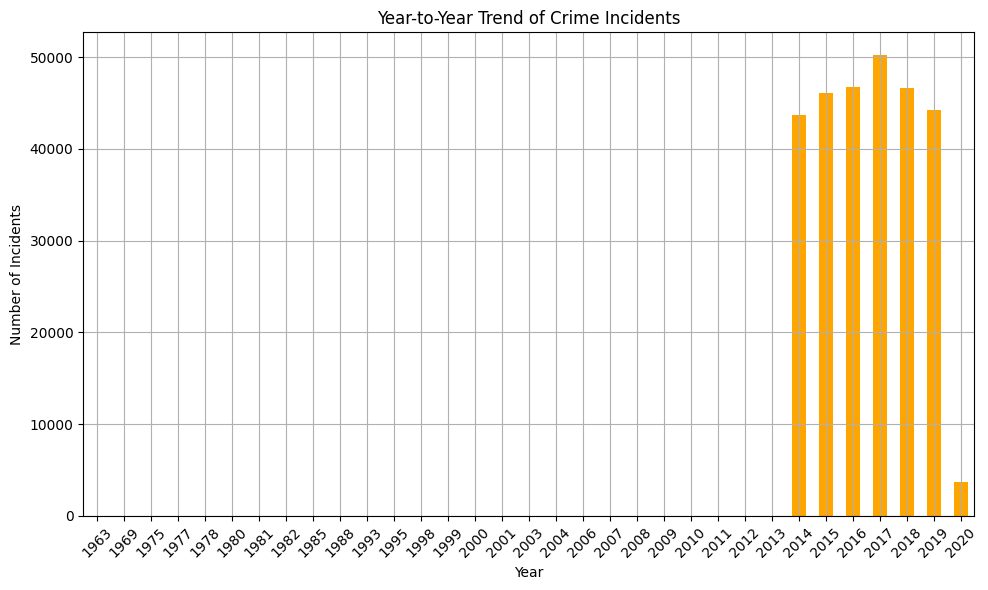

In [68]:
import matplotlib.pyplot as plt

# Convert 'CrimeDate' to datetime format for easier manipulation
crime_data['CrimeDate'] = pd.to_datetime(crime_data['CrimeDate'], errors='coerce')

# Extract year, month, and day of week from CrimeDate
crime_data['Year'] = crime_data['CrimeDate'].dt.year
crime_data['Month'] = crime_data['CrimeDate'].dt.month
crime_data['DayOfWeek'] = crime_data['CrimeDate'].dt.day_name()

# Plotting the year-to-year trend of overall crime incidents
yearly_counts = crime_data['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='orange')
plt.title('Year-to-Year Trend of Crime Incidents')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 2. Plots to describe the temporal pattern monthly trend of crime incidents from all geo-locations


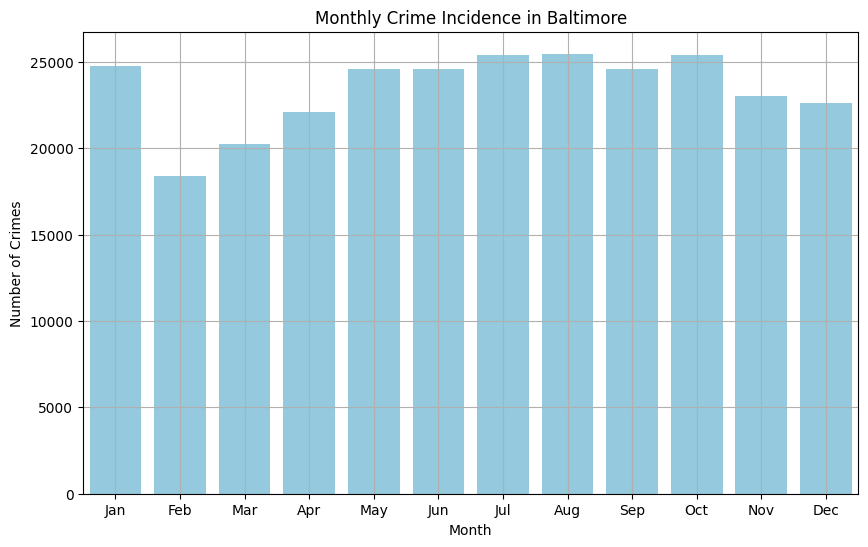

In [60]:
import seaborn as sns

# Aggregating data by month for all years
all_years_monthly_crime = crime_data['Month'].value_counts().sort_index()

# Plotting the monthly crime incidence as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=all_years_monthly_crime.index, y=all_years_monthly_crime.values, color='skyblue')
plt.title('Monthly Crime Incidence in Baltimore')
plt.xlabel('Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

#### 2. Plots to describe the temporal pattern daily classified trend of crime incidents from all geo-locations


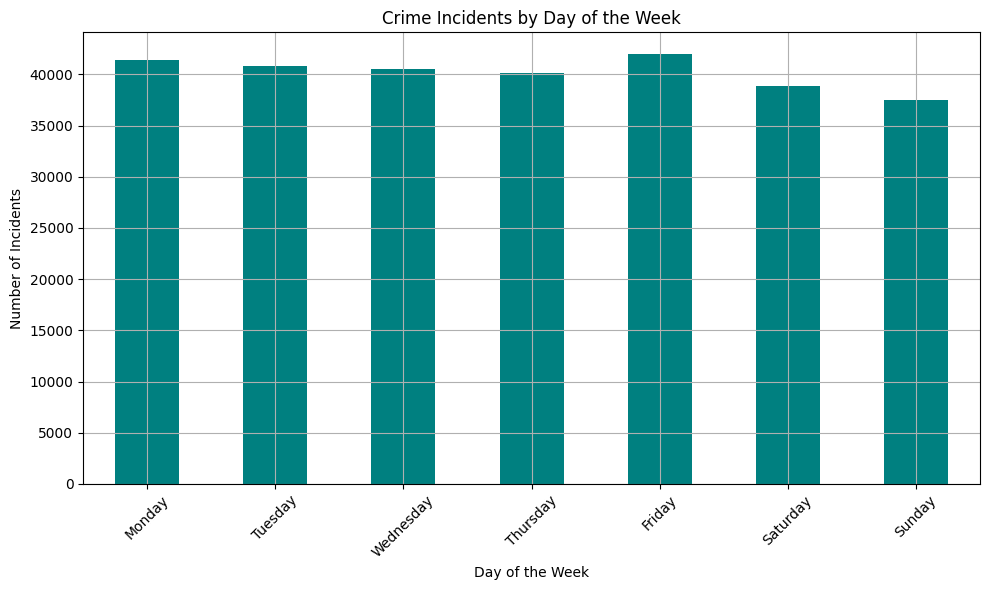

In [61]:
# Counting incidents by day of the week
day_of_week_counts = crime_data['DayOfWeek'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the day-of-week trends in crime incidents
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='teal')
plt.title('Crime Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3. A plot describing the distribution of crime type aggregating from all geo-locations and all time periods;


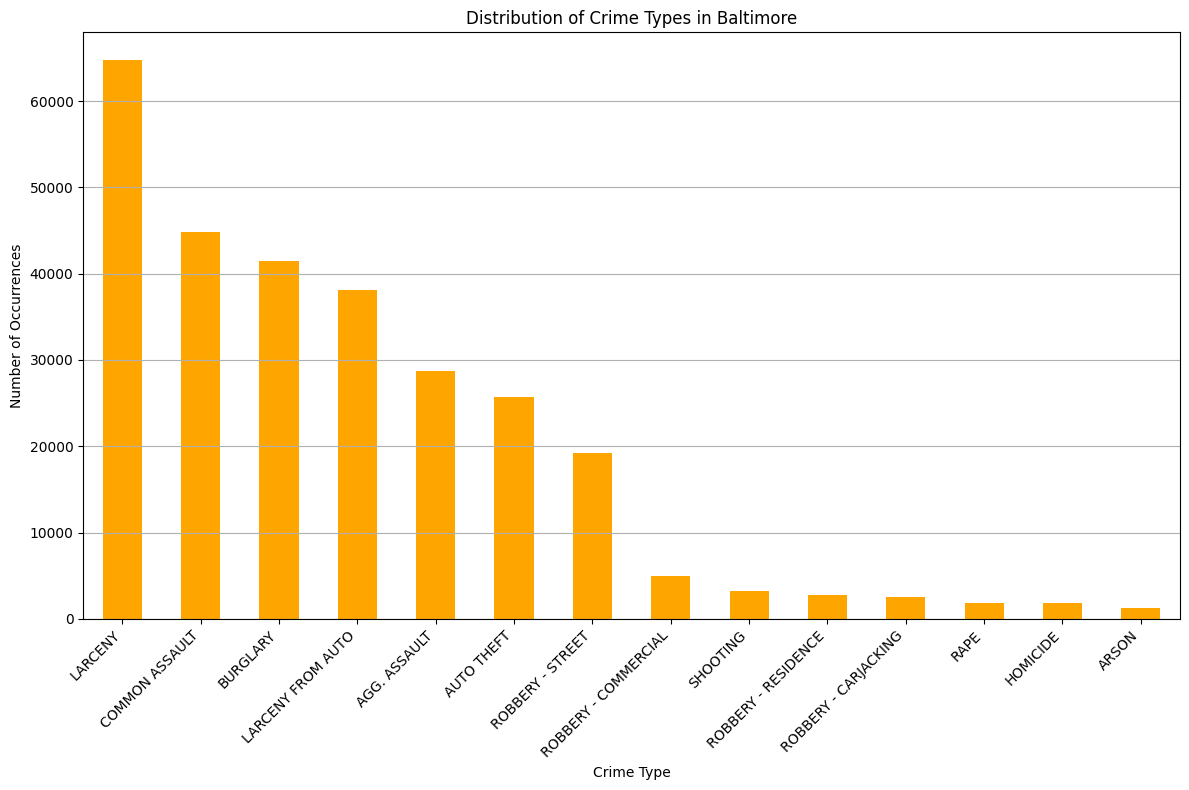

In [67]:
# Aggregate the data by 'Description' to count occurrences of each crime type
crime_counts = crime_data['Description'].value_counts()

# Create the plot
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
crime_counts.plot(kind='bar', color='orange')  # Use a bar chart and set a color
plt.title('Distribution of Crime Types in Baltimore')  # Title of the plot
plt.xlabel('Crime Type')  # Label for the x-axis
plt.ylabel('Number of Occurrences')  # Label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.grid(True, axis='y')
plt.show()  # Display the plot

### 4. A plot describing the YEARLY distribution of crime type aggregating from all geo-locations;


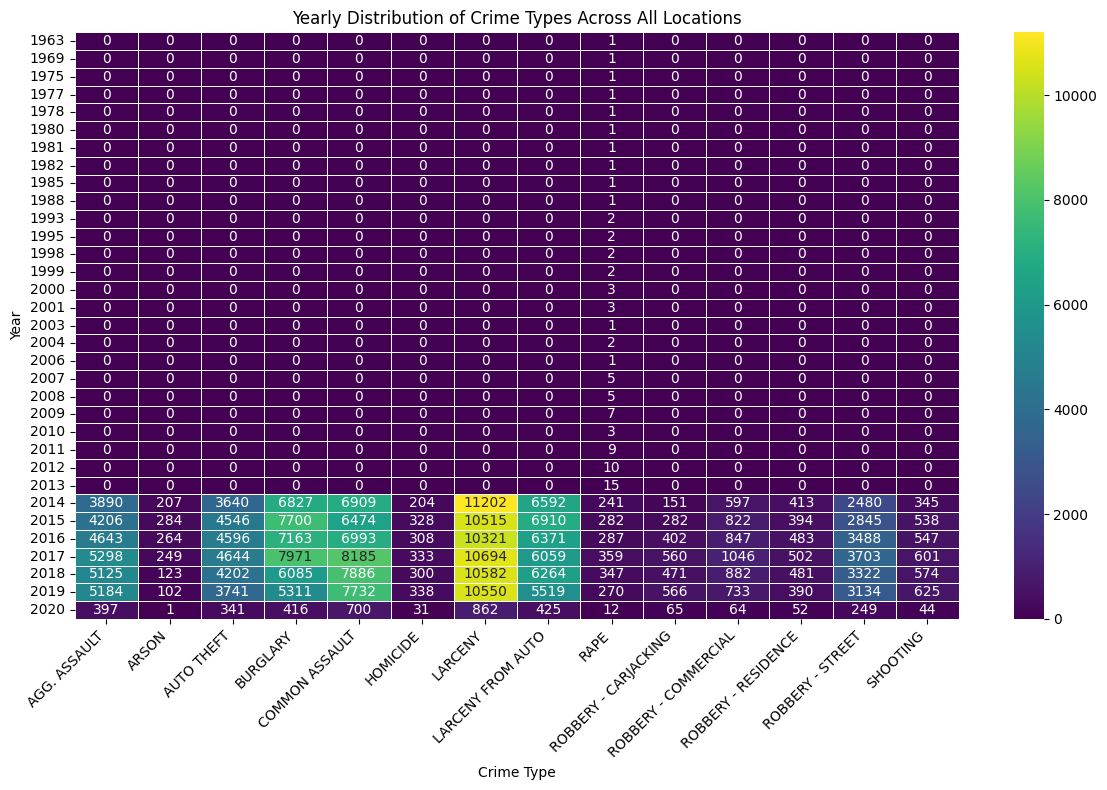

In [63]:
# Group the data by 'Year' and 'Description' and count occurrences
yearly_crime_distribution = crime_data.groupby(['Year', 'Description']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
sns.heatmap(yearly_crime_distribution, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Yearly Distribution of Crime Types Across All Locations')  # Title of the heatmap
plt.xlabel('Crime Type')  # Label for the x-axis
plt.ylabel('Year')  # Label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()  # Display the heatmap

### 4. A plot describing the YEARLY distribution of crime type aggregating from all geo-locations;


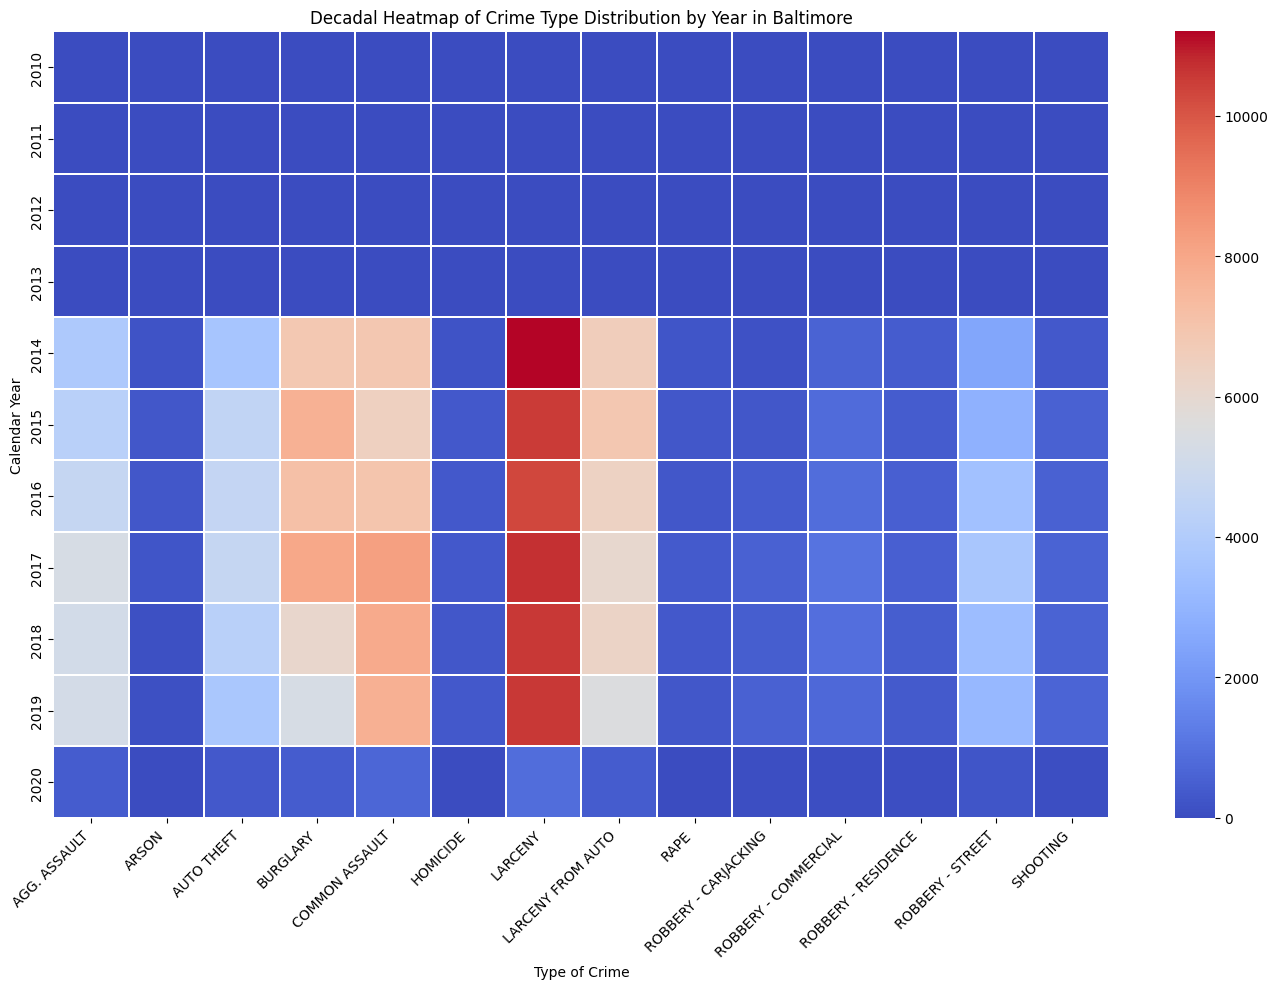

In [64]:
recent_data = crime_data[crime_data['Year'] >= crime_data['Year'].max() - 10]
# Group data by 'Year' and 'Description' to prepare for the heatmap
heatmap_data = recent_data.groupby(['Year', 'Description']).size().unstack(fill_value=0)

# Create the heatmap using seaborn
plt.figure(figsize=(14, 10))  # Slightly larger figure size for better readability
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, linewidths=0.3)  # finer lines
plt.title('Decadal Heatmap of Crime Type Distribution by Year in Baltimore')
plt.xlabel('Type of Crime')
plt.ylabel('Calendar Year')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better label visibility

# Improve layout and display the plot
plt.tight_layout()
plt.show()

### 4. A plot describing the MONTHLY distribution of crime type aggregating from all geo-locations;


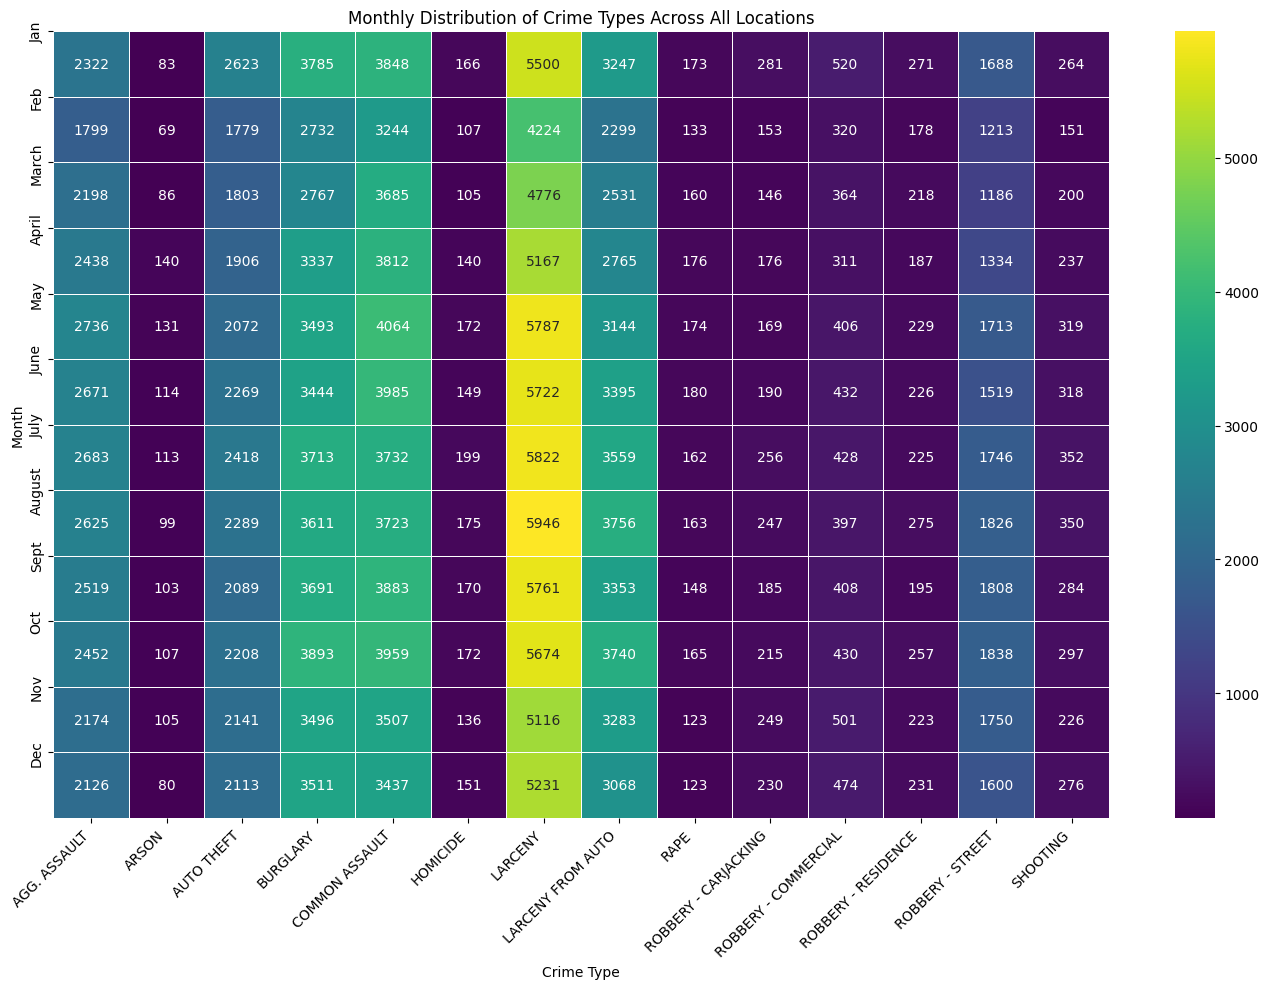

In [65]:
# Group the data by 'Month' and 'Description' to count occurrences
monthly_crime_distribution = crime_data.groupby(['Month', 'Description']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(14, 10))  # Set the figure size for better readability
sns.heatmap(monthly_crime_distribution, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Monthly Distribution of Crime Types Across All Locations')  # Title of the heatmap
plt.xlabel('Crime Type')  # Label for the x-axis
plt.ylabel('Month')  # Label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
plt.yticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'March', 'April', 'May', 'June', 
    'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec'
])  # Set custom labels for the months
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()  # Display the heatmap

### 4. A plot describing the DAILY distribution of crime type aggregating from all geo-locations;


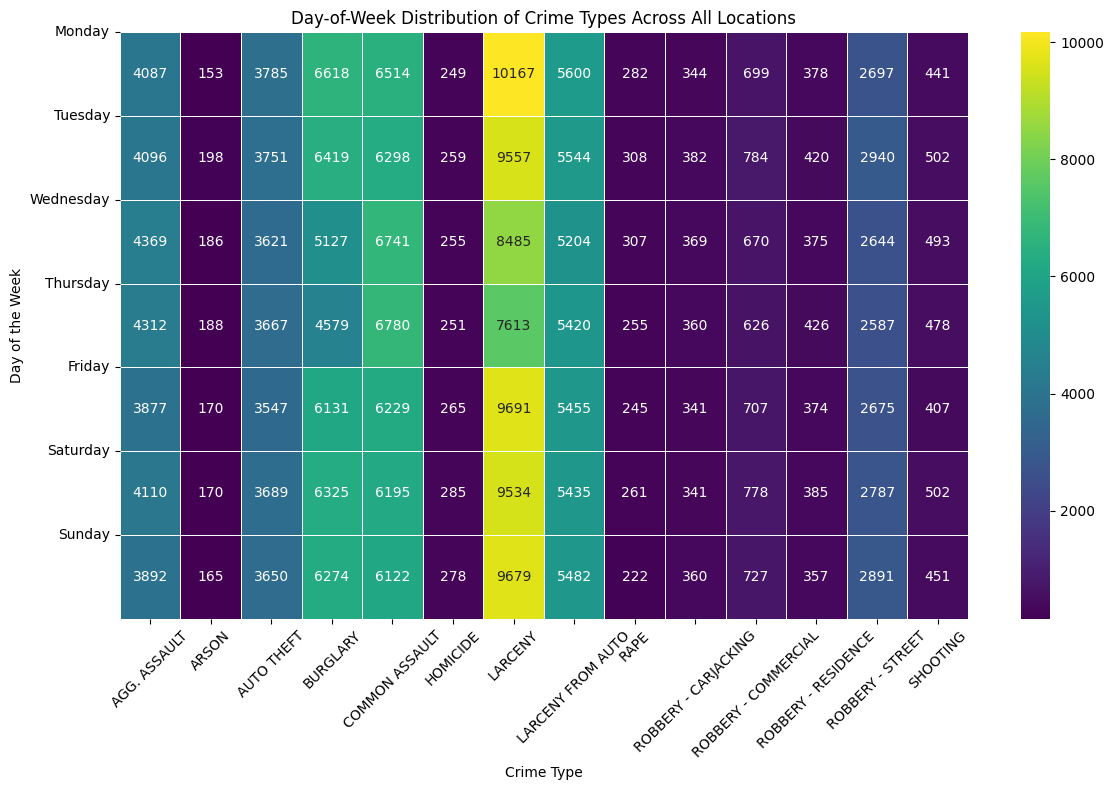

In [66]:


# Group the data by 'DayOfWeek' and 'Description' to count occurrences
day_of_week_crime_distribution = crime_data.groupby(['DayOfWeek', 'Description']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
sns.heatmap(day_of_week_crime_distribution, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Day-of-Week Distribution of Crime Types Across All Locations')  # Title of the heatmap
plt.xlabel('Crime Type')  # Label for the x-axis
plt.ylabel('Day of the Week')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.yticks(ticks=range(7), labels=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], rotation=0)  # Set custom labels for the days of the week
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()  # Display the heatmap

In [33]:

# Save the DataFrame to a new CSV file
output_path = 'C:/Users/Suyash Kalwani/Downloads/SUYASHKALWANIHOMEWORK1EXCEL.csv'
crime_data.to_csv(output_path, index=False)
print(f"Data saved to {output_path}")

Data saved to C:/Users/Suyash Kalwani/Downloads/SUYASHKALWANIHOMEWORK1EXCEL.csv
